## Imports and data‐loading

In [3]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Build paths to CSVs
base_dir   = os.path.join("..", "data")
red_path   = os.path.join(base_dir, "winequality-red.csv")
white_path = os.path.join(base_dir, "winequality-white.csv")

# Load raw data
red_df   = pd.read_csv(red_path, sep=";")
white_df = pd.read_csv(white_path, sep=";")
red_df["color"]   = "red"
white_df["color"] = "white"
df = pd.concat([red_df, white_df], ignore_index=True)

# Create binary label: 1 if quality >= 6, else 0
df["good"] = (df["quality"] >= 6).astype(int)

df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


## Basic overview & class balance

Shape: (6497, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  good                  6497 non-null   int32  
dtypes: float64(11), int32(1), int64(1), object(1)
memory u

None

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


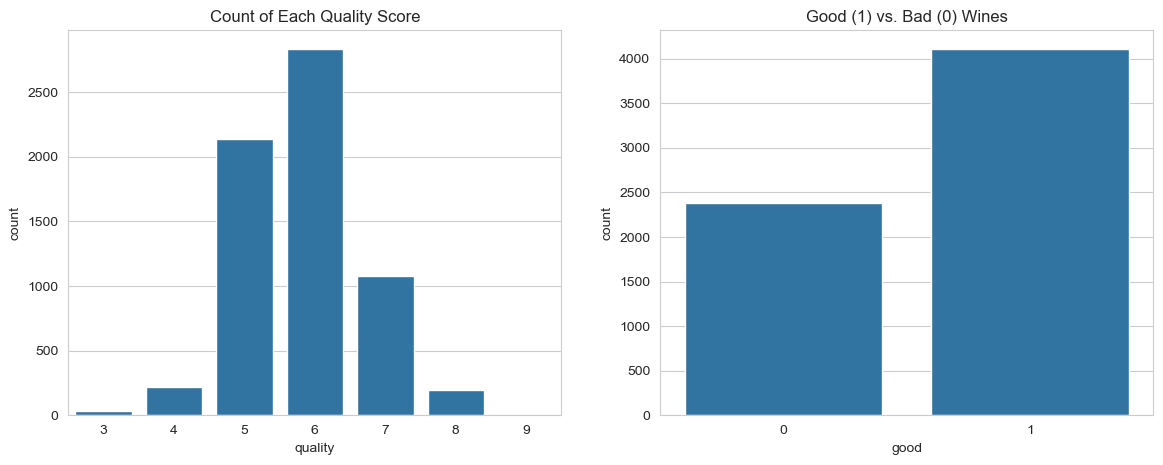

In [6]:
# 1. Number of rows and columns
print("Shape:", df.shape)

# 2. Data types and non-null counts
display(df.info())

# 3. Summary statistics for all numerical features
display(df.describe().T)

# 4. Distribution of quality scores (0–10) and of the binary label
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x="quality", data=df, ax=axes[0])
axes[0].set_title("Count of Each Quality Score")

sns.countplot(x="good", data=df, ax=axes[1])
axes[1].set_title("Good (1) vs. Bad (0) Wines")

plt.show()


## Per‐color breakdown of quality

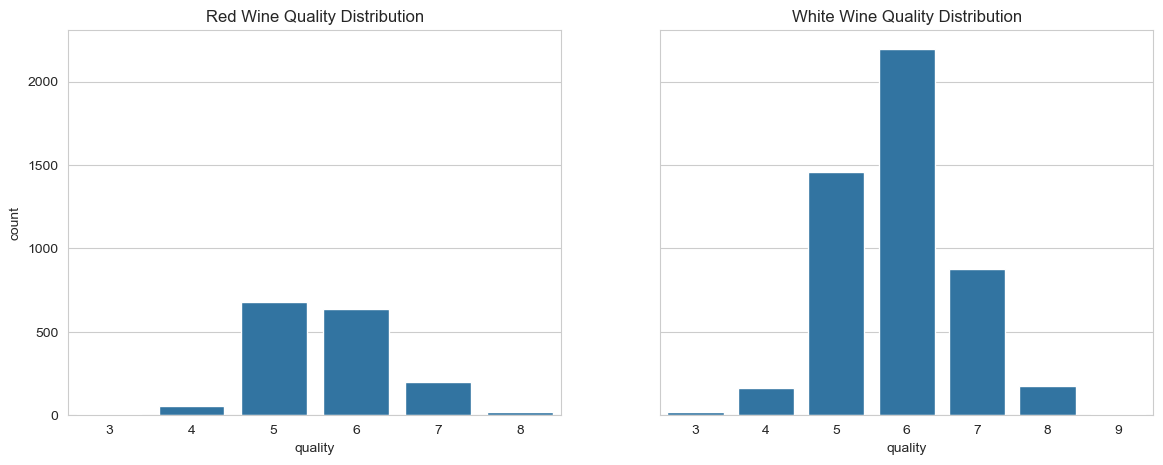

good,0,1
color,,
red,0.465291,0.534709
white,0.334831,0.665169


In [17]:
# Separate red vs. white
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.countplot(x="quality", data=df[df["color"]=="red"], ax=axes[0])
axes[0].set_title("Red Wine Quality Distribution")

sns.countplot(x="quality", data=df[df["color"]=="white"], ax=axes[1])
axes[1].set_title("White Wine Quality Distribution")

plt.show()

# Also show good/bad ratio by color:
ratio = df.groupby("color")["good"].value_counts(normalize=True).unstack()
display(ratio)


## Feature distributions (histograms & KDEs)

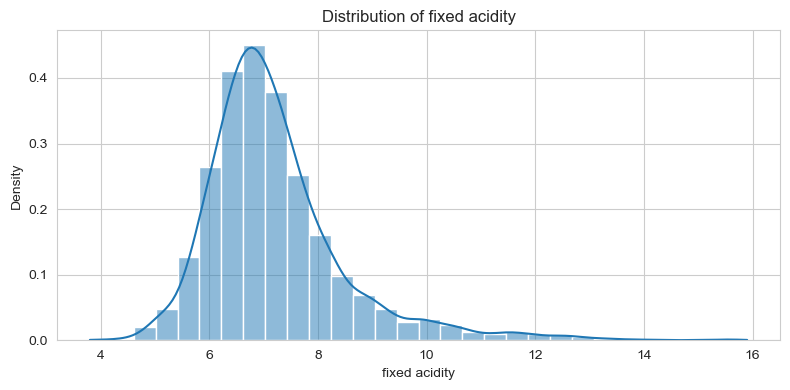

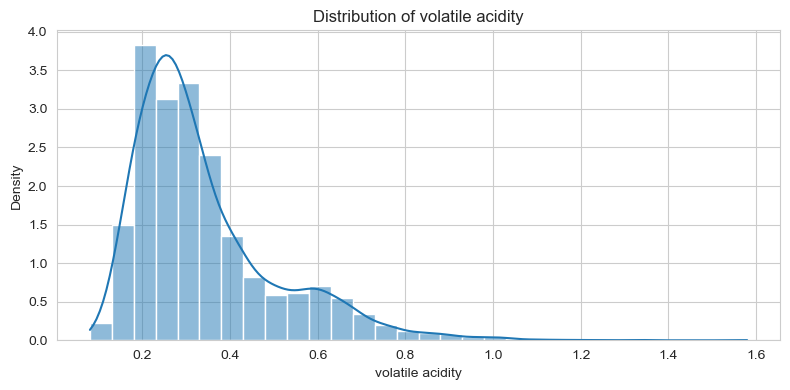

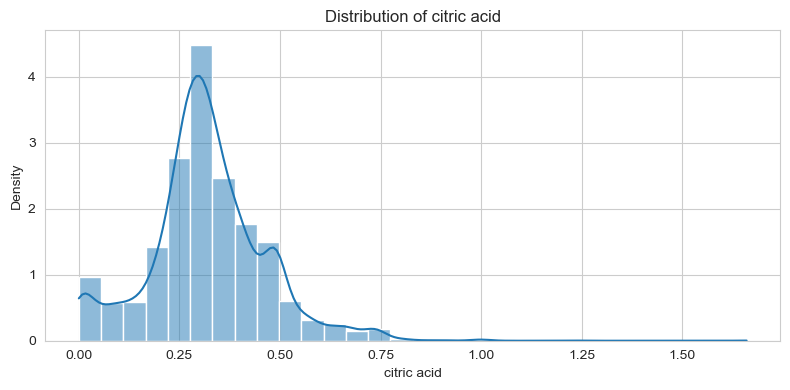

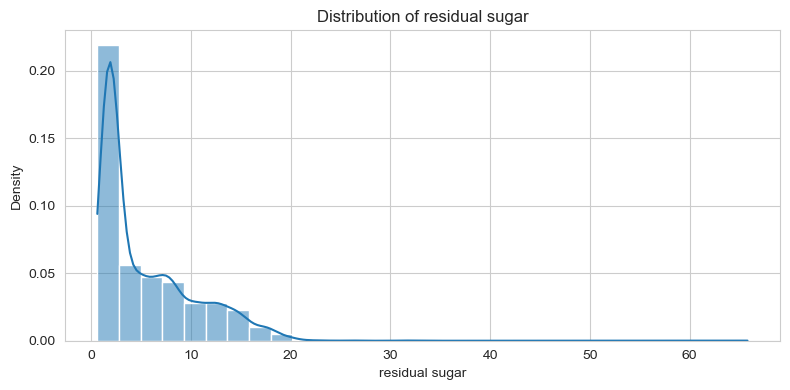

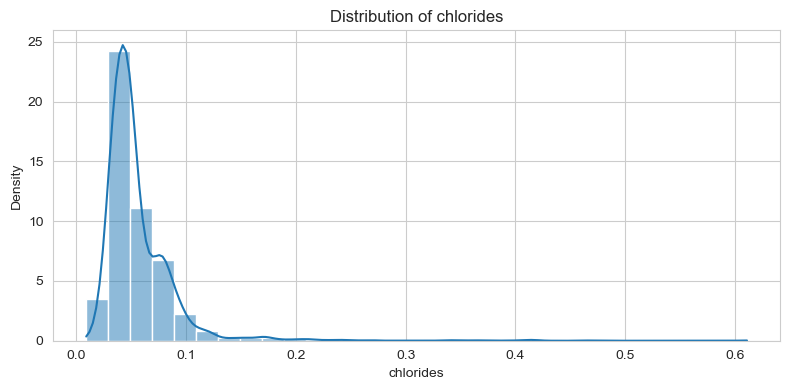

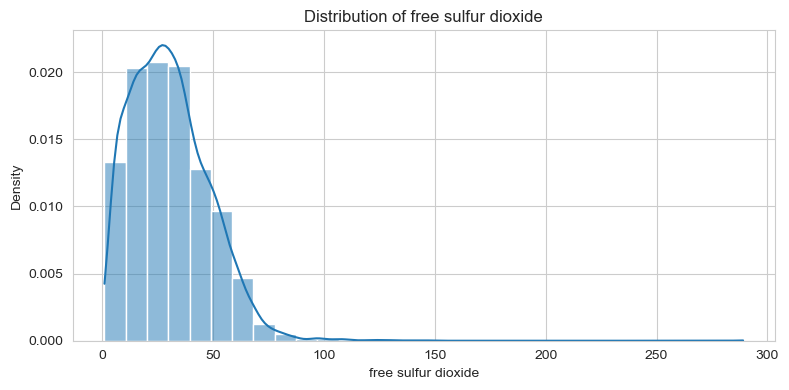

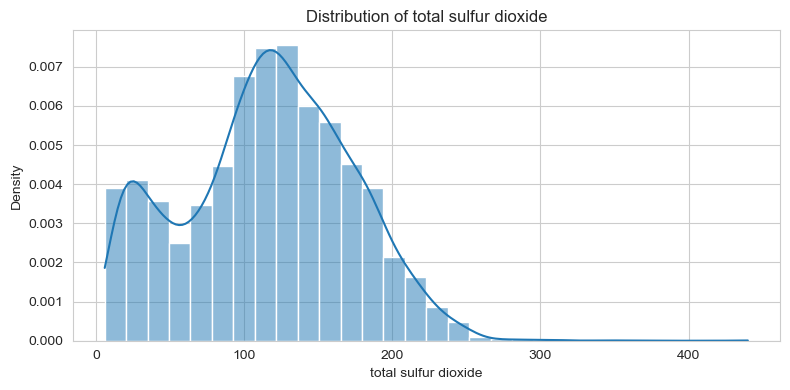

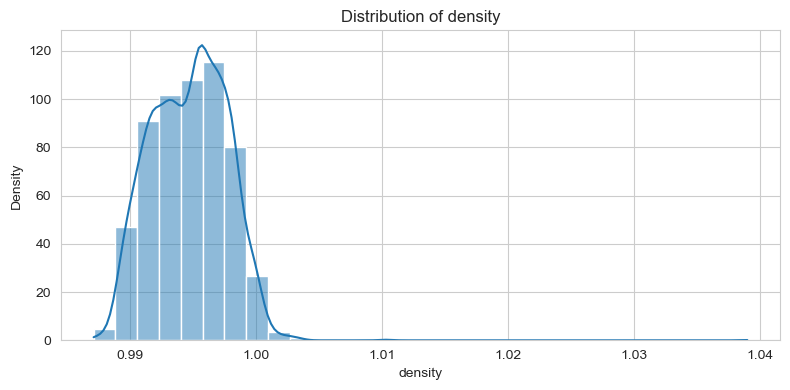

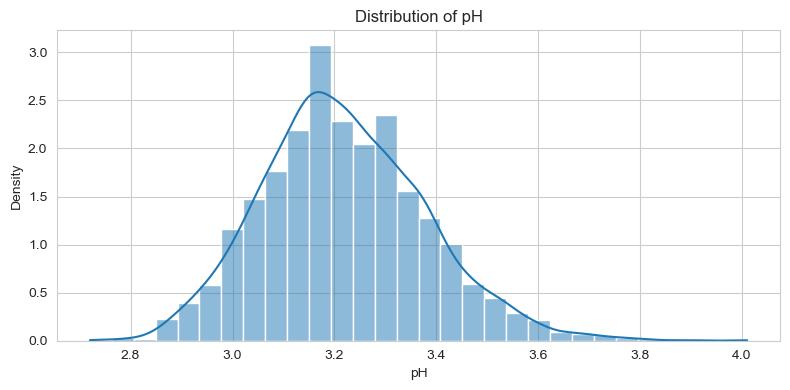

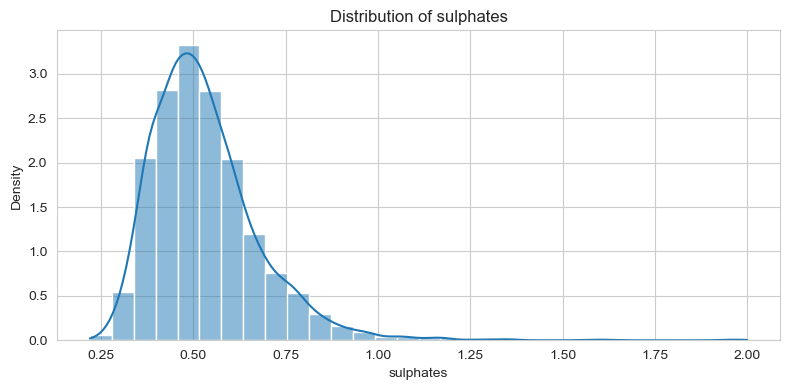

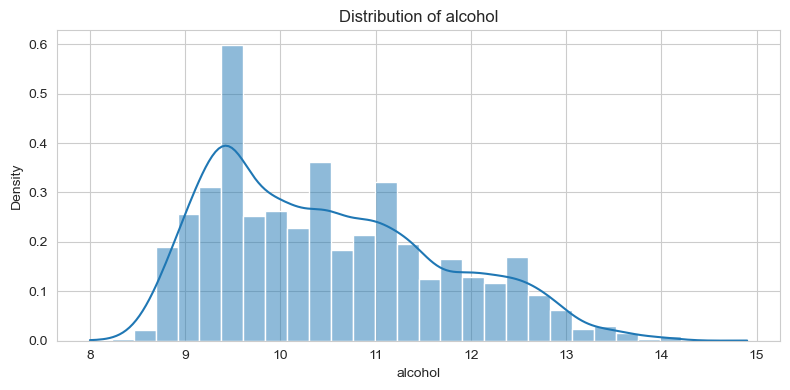

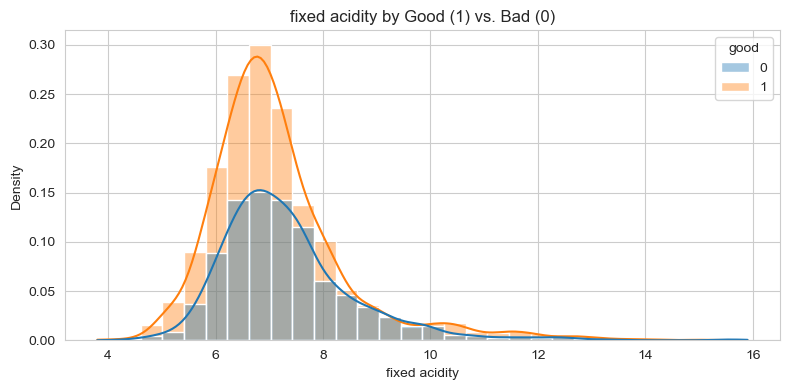

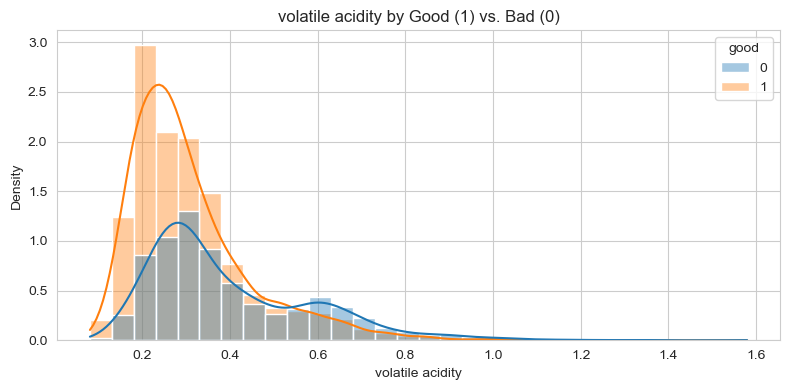

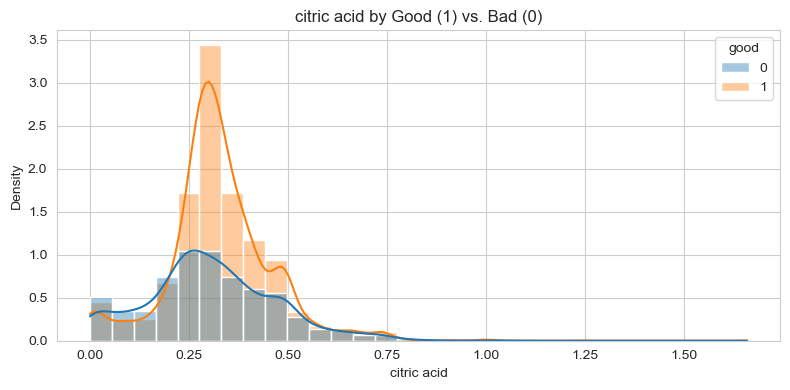

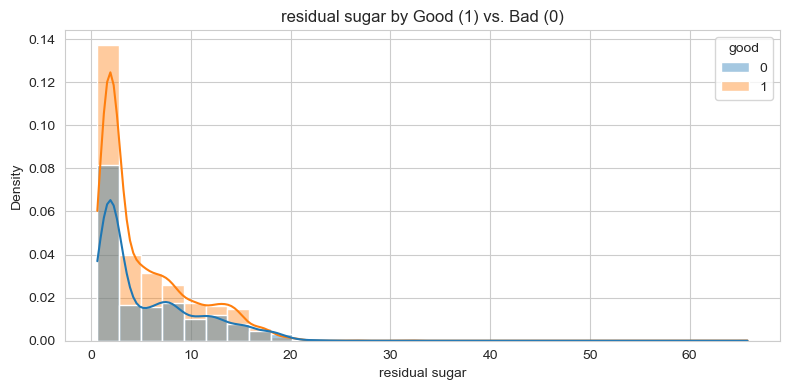

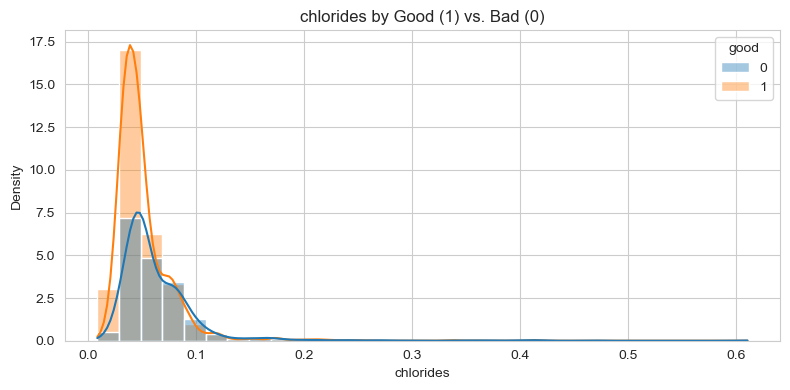

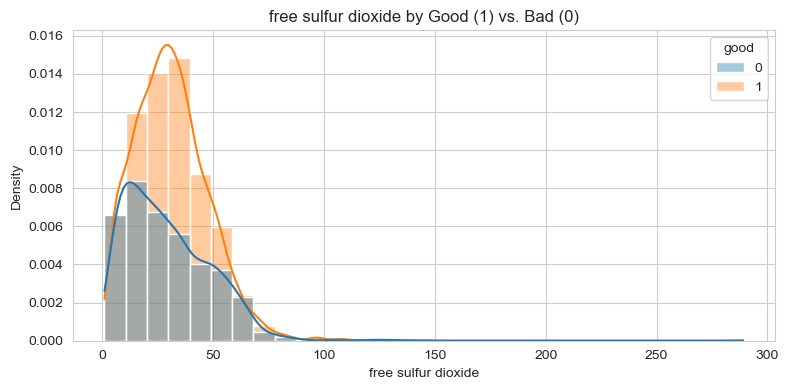

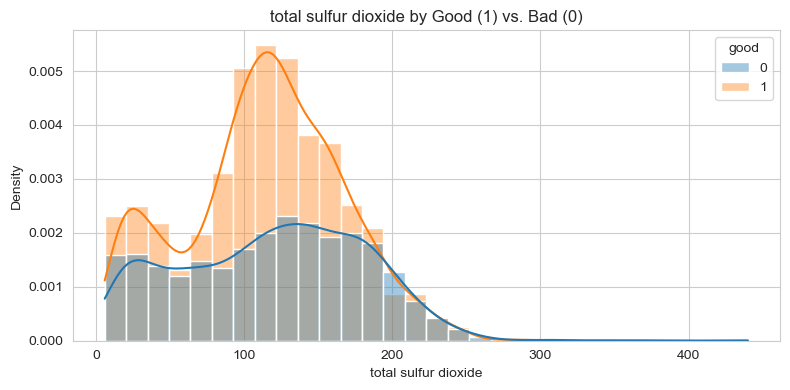

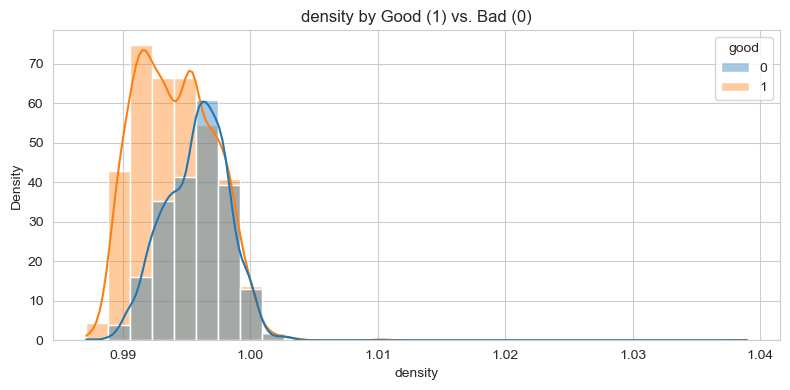

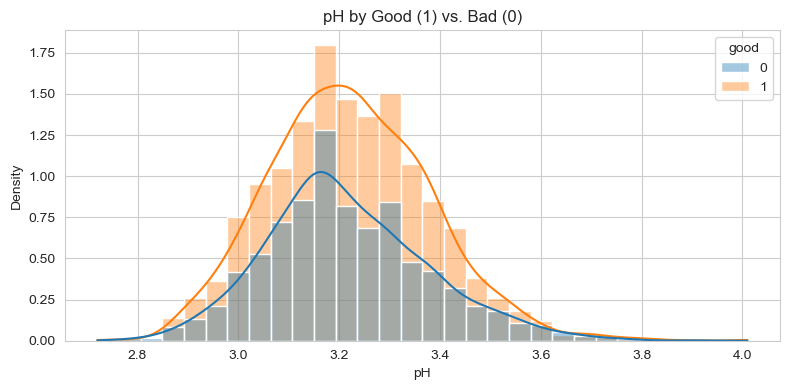

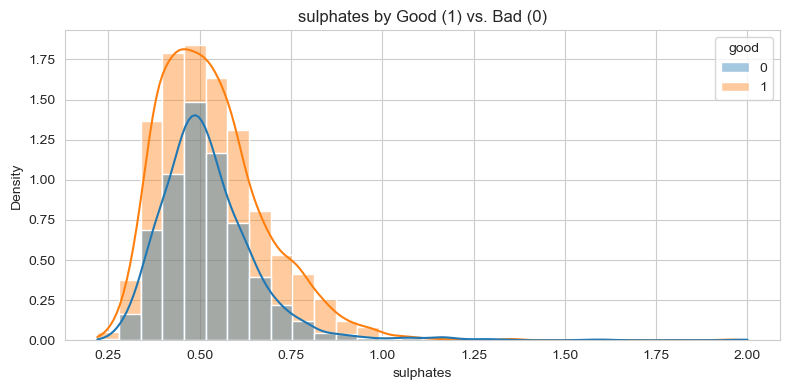

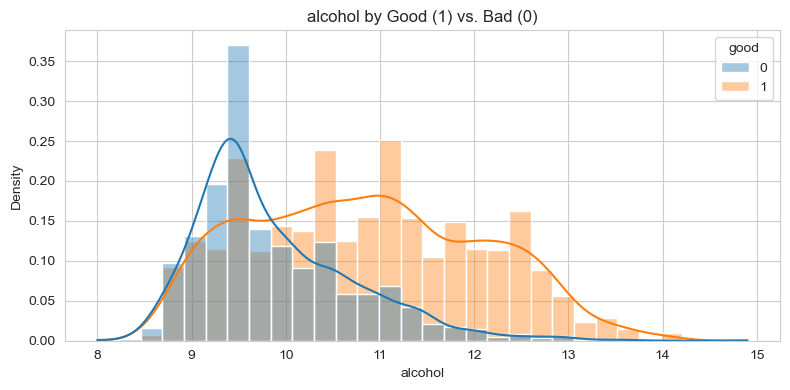

In [20]:
# List of numeric features (exclude 'quality', 'good', 'color')
num_cols = [c for c in df.columns 
            if c not in ["quality", "good", "color"]]

# Plot histogram + KDE for each numeric feature (overall)
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, stat="density", bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

# Plot histograms overlayed by good vs. bad
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue="good", kde=True, stat="density", bins=30, alpha=0.4)
    plt.title(f"{col} by Good (1) vs. Bad (0)")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


## Boxplots & Violin plots by good

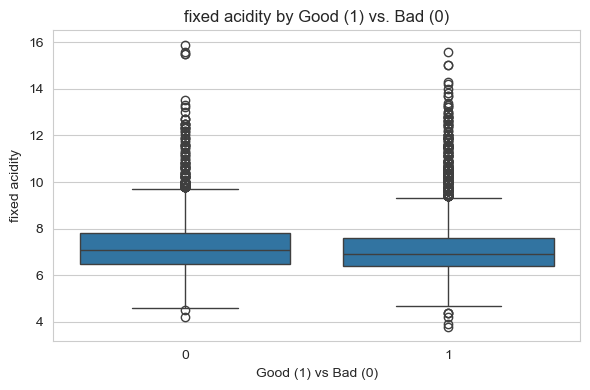

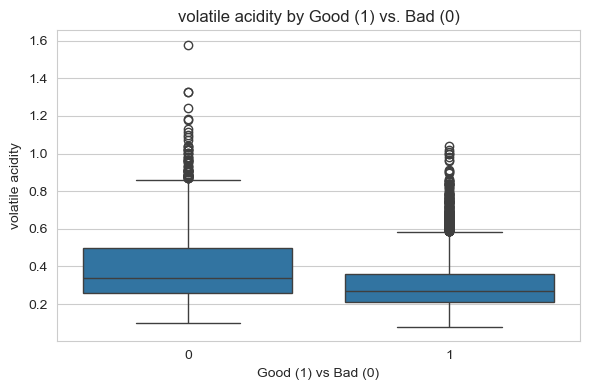

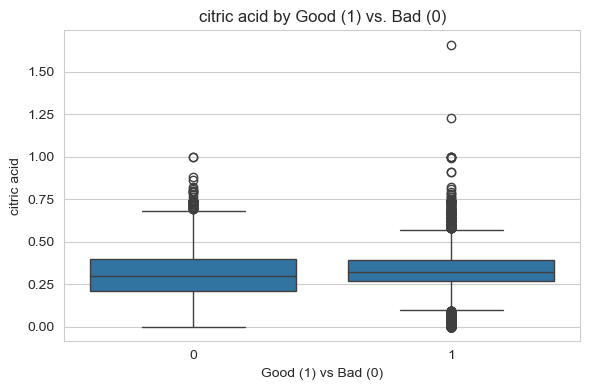

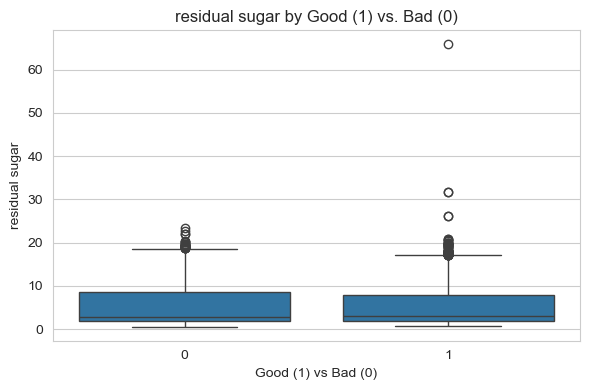

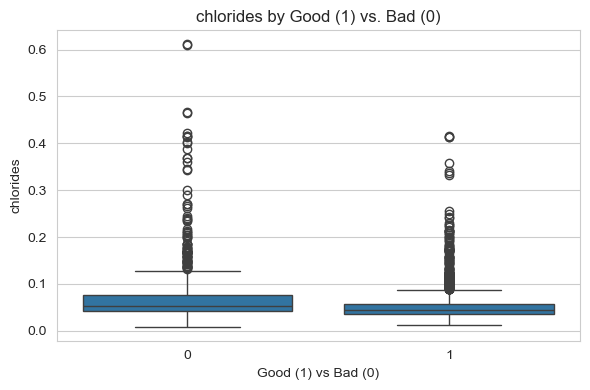

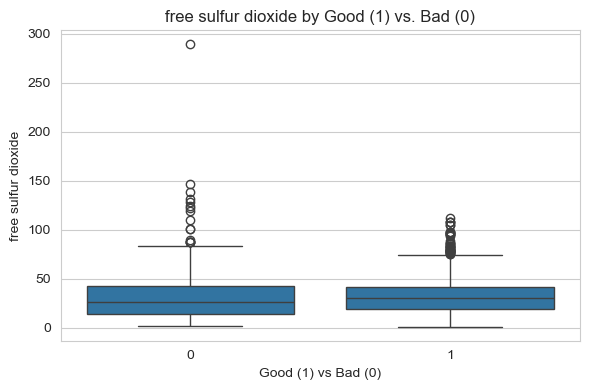

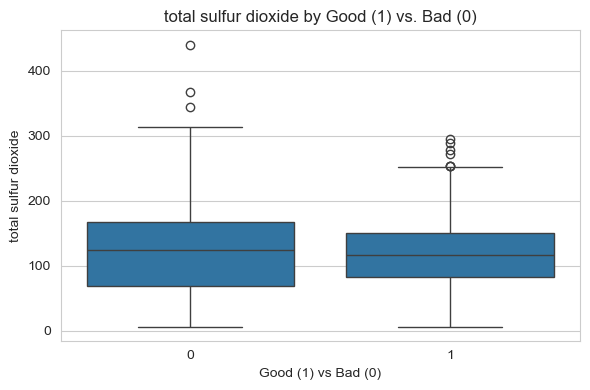

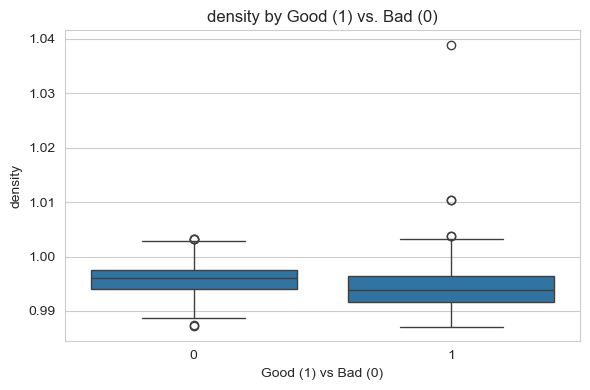

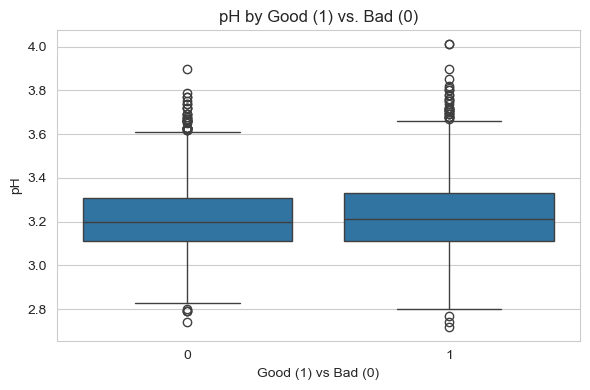

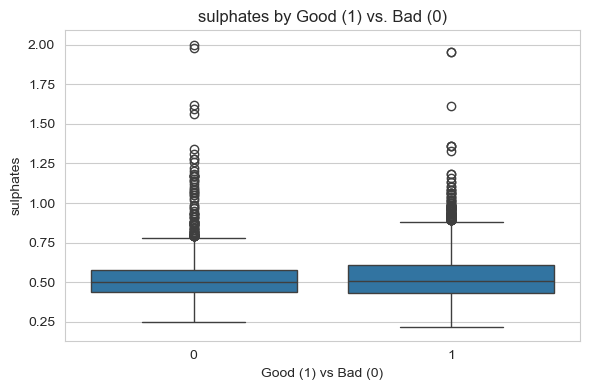

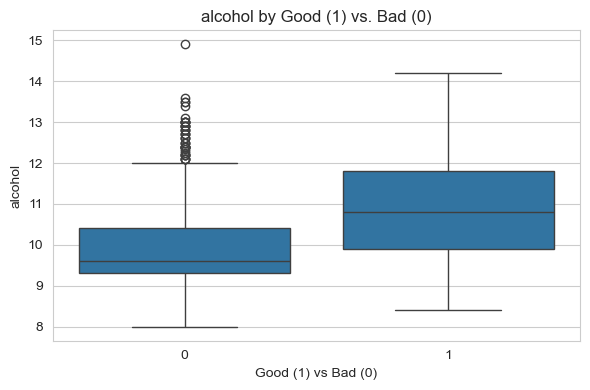

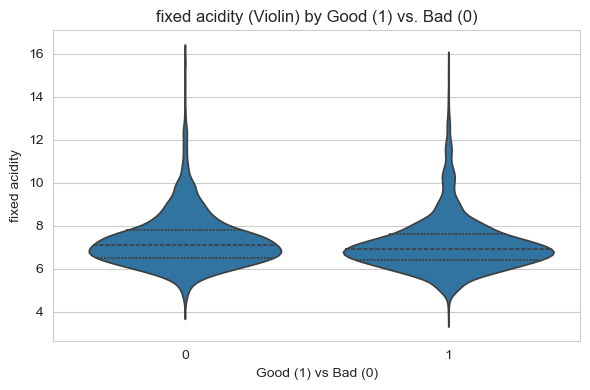

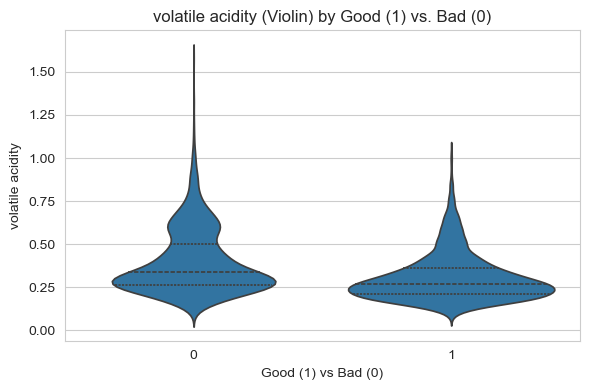

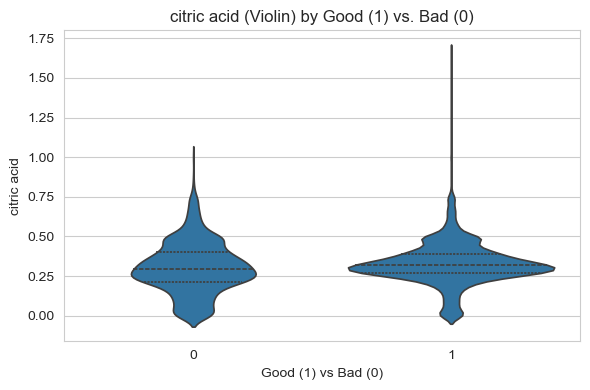

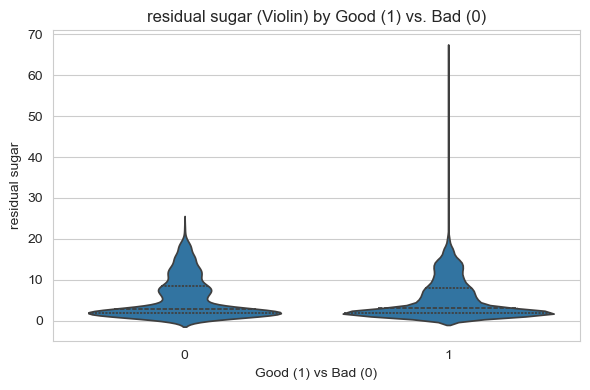

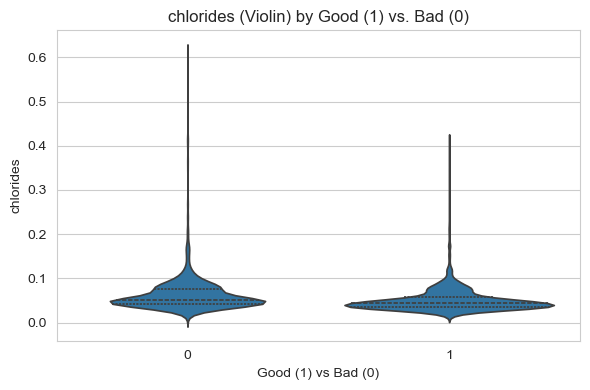

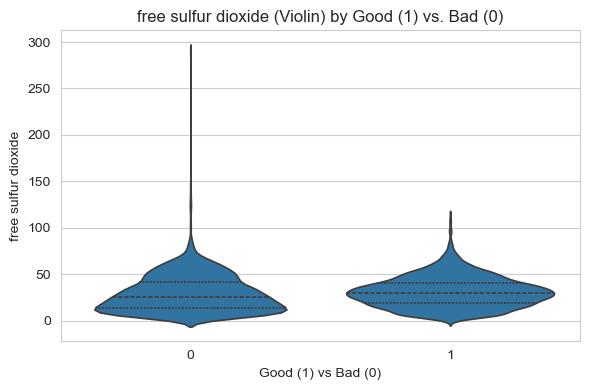

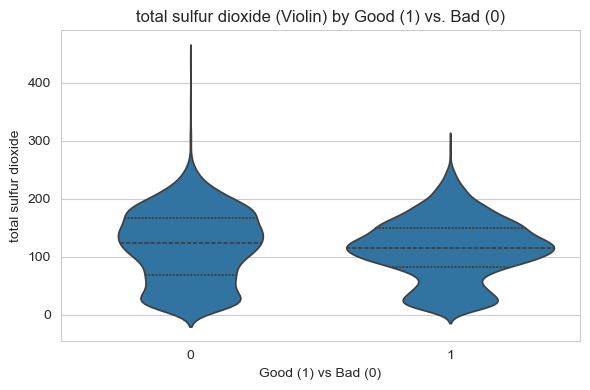

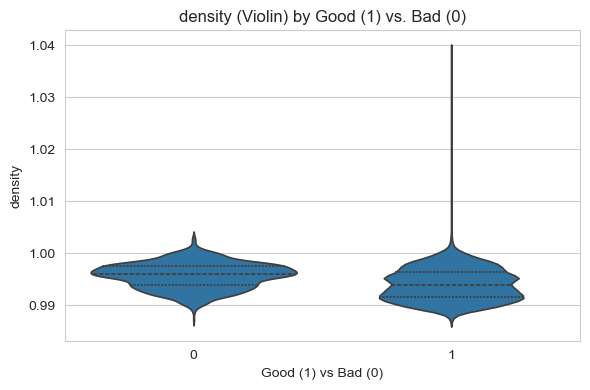

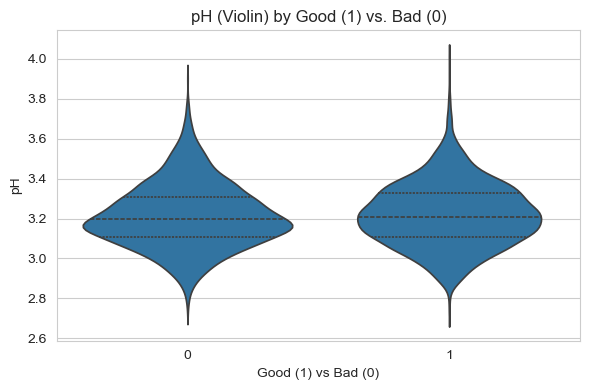

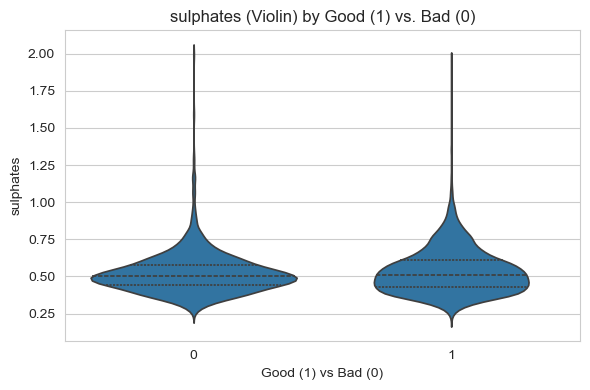

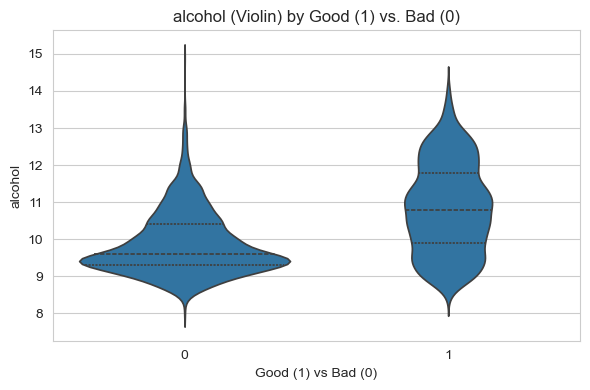

In [23]:
# Boxplots for each feature split by good/bad
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="good", y=col, data=df)
    plt.title(f"{col} by Good (1) vs. Bad (0)")
    plt.xlabel("Good (1) vs Bad (0)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Violin plots for a more detailed view
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x="good", y=col, data=df, inner="quartile")
    plt.title(f"{col} (Violin) by Good (1) vs. Bad (0)")
    plt.xlabel("Good (1) vs Bad (0)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Boxplots & Violin plots by color

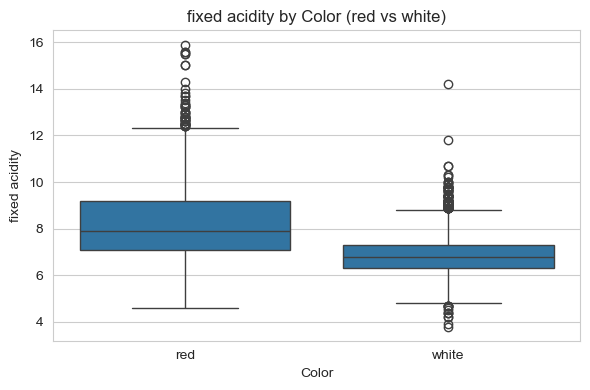

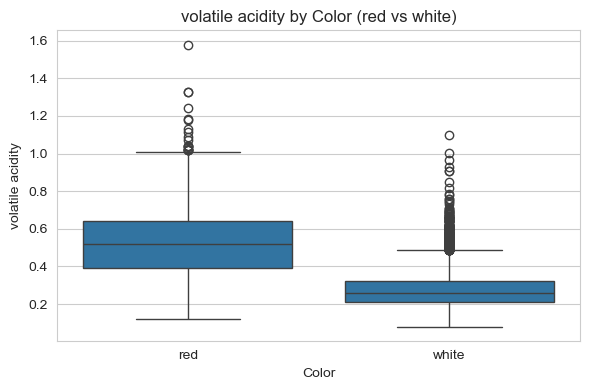

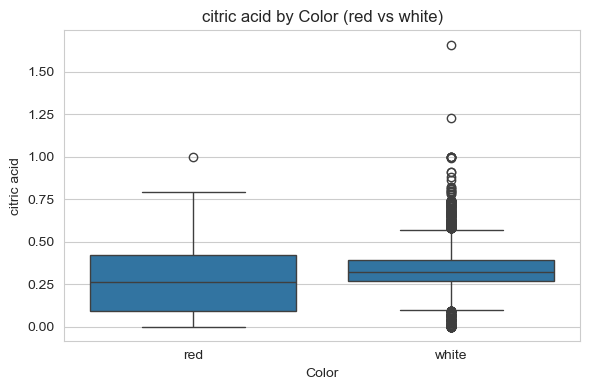

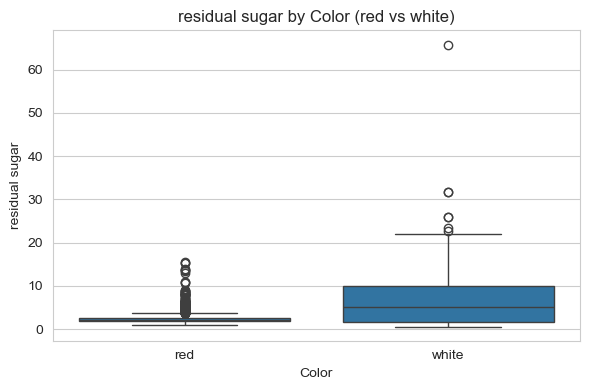

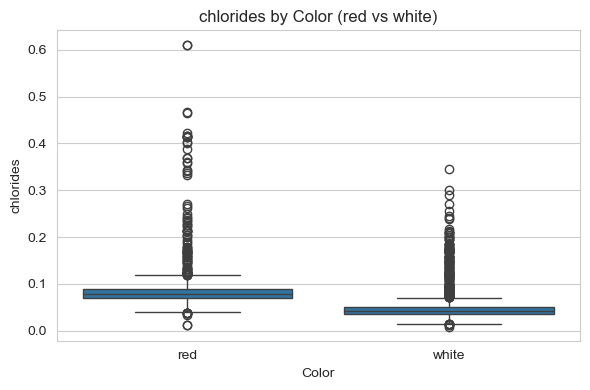

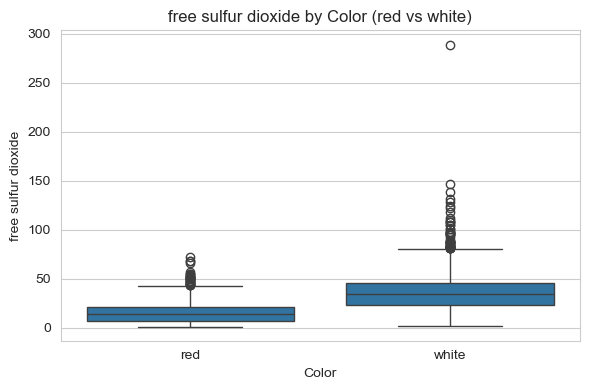

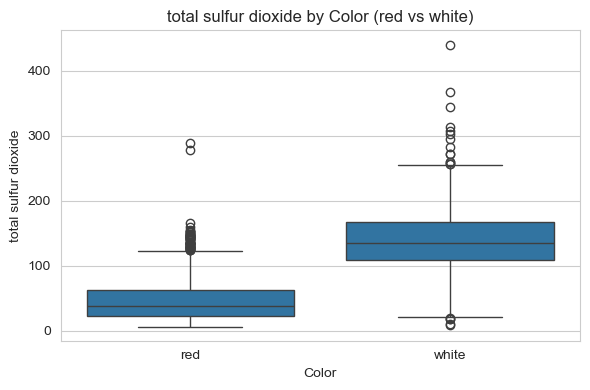

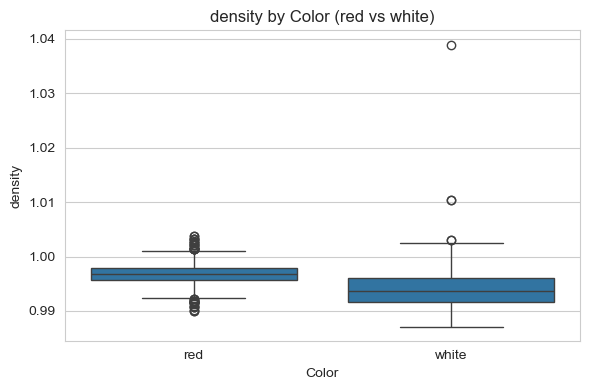

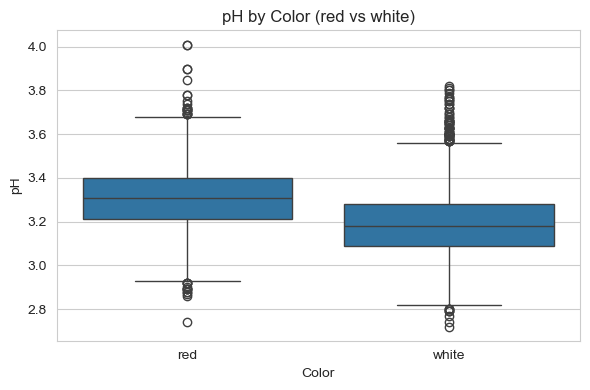

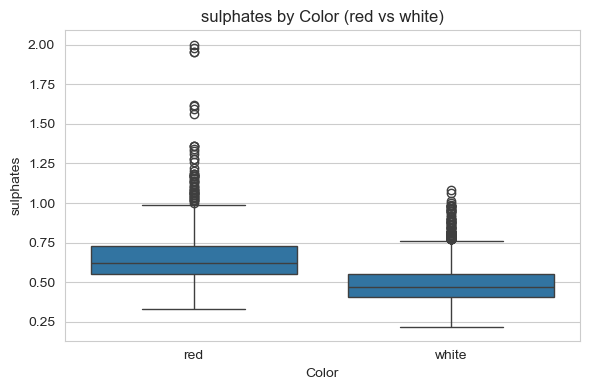

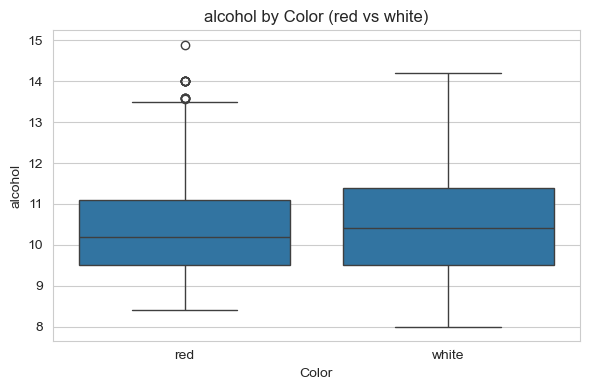

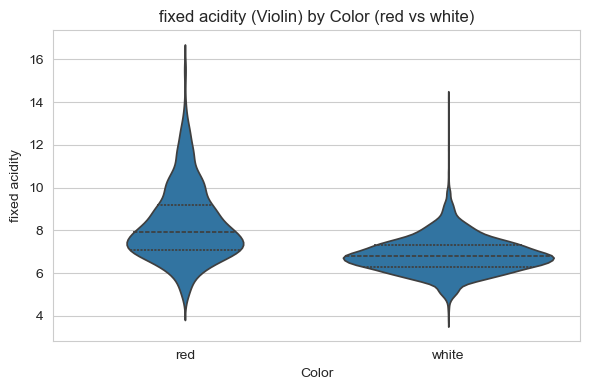

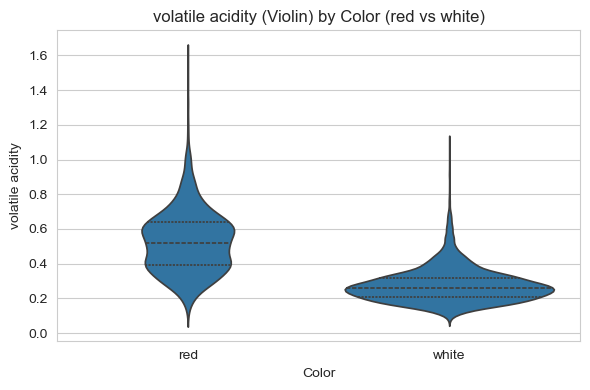

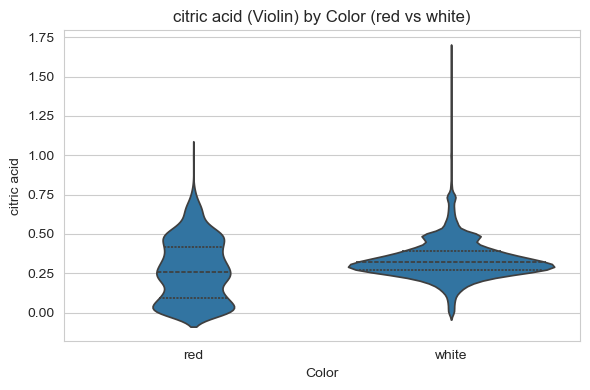

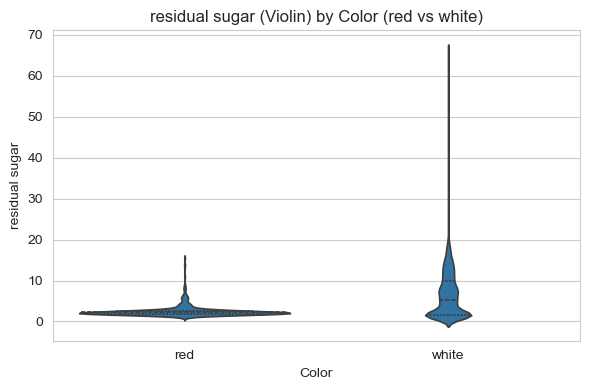

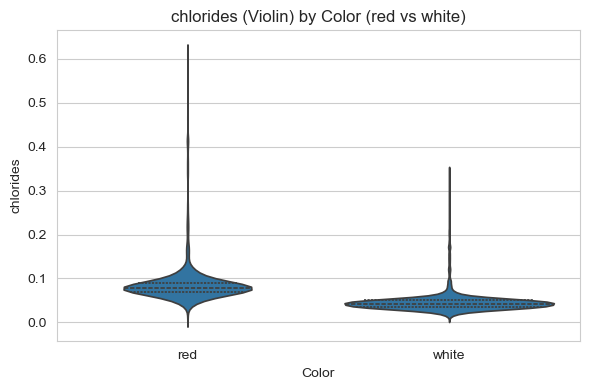

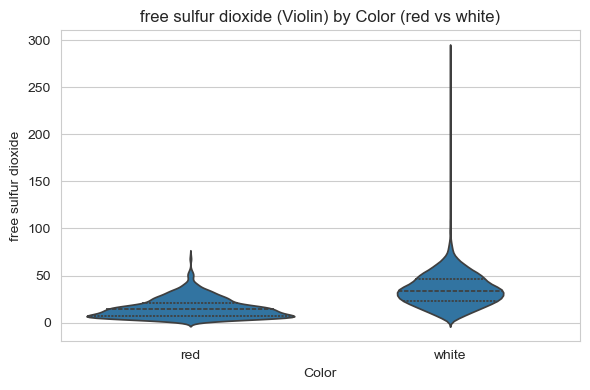

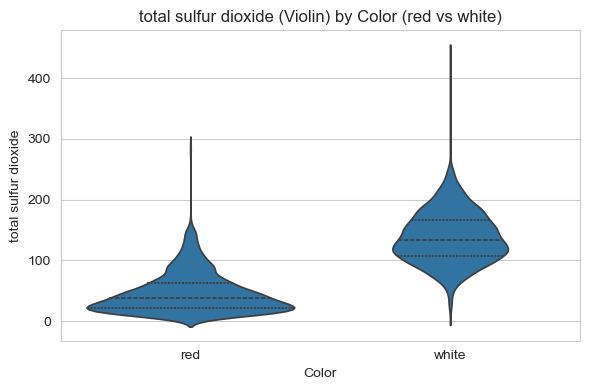

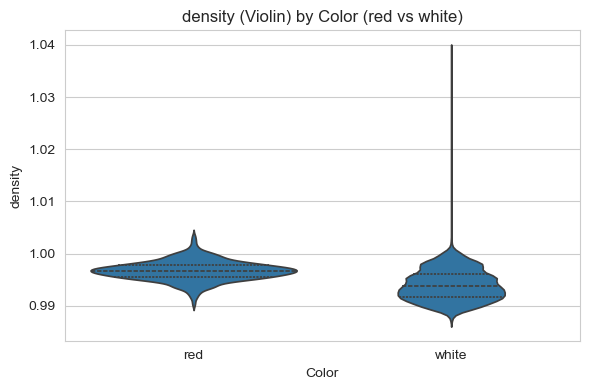

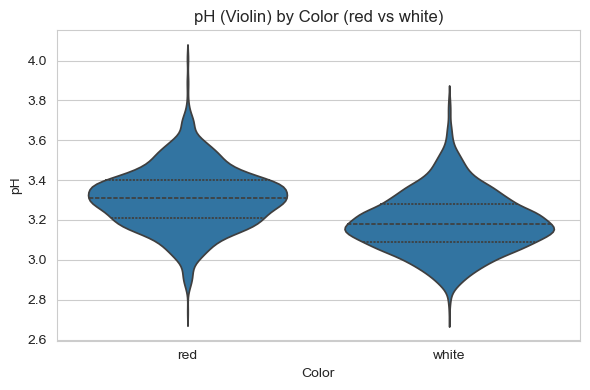

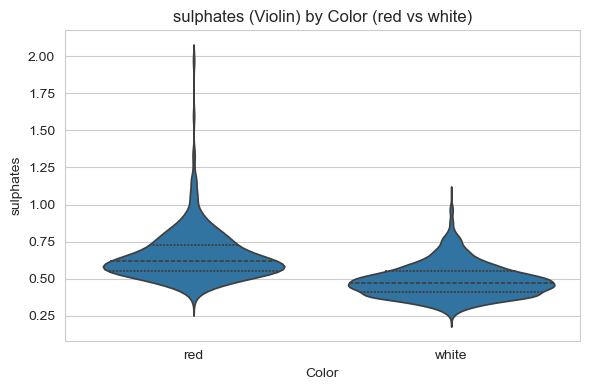

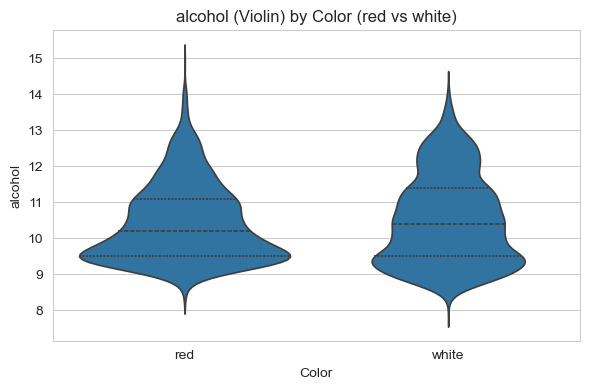

In [26]:
# Boxplots for each feature split by red vs. white
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="color", y=col, data=df)
    plt.title(f"{col} by Color (red vs white)")
    plt.xlabel("Color")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Violin plots for each feature by color
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x="color", y=col, data=df, inner="quartile")
    plt.title(f"{col} (Violin) by Color (red vs white)")
    plt.xlabel("Color")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


## Correlation matrix & heatmap

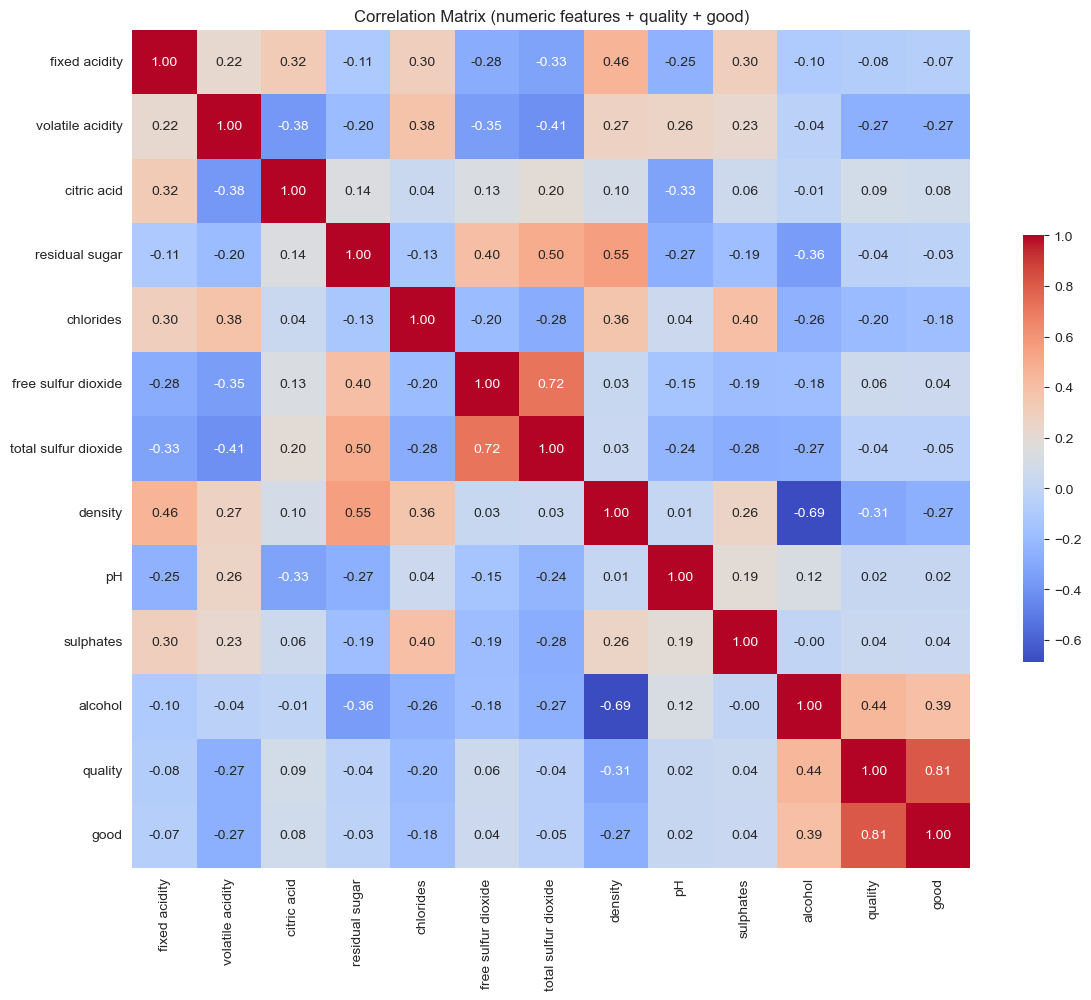

In [29]:
# Compute correlation matrix of only numeric features (excluding color)
corr = df[num_cols + ["quality", "good"]].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (numeric features + quality + good)")
plt.tight_layout()
plt.show()


## Pairplot (scatter‐matrix) for select features

In [32]:
corr_with_quality = corr["quality"].abs().sort_values(ascending=False)
top_feats = corr_with_quality.index[1:6]  # skip 'quality' itself
top_feats.tolist()


['good', 'alcohol', 'density', 'volatile acidity', 'chlorides']

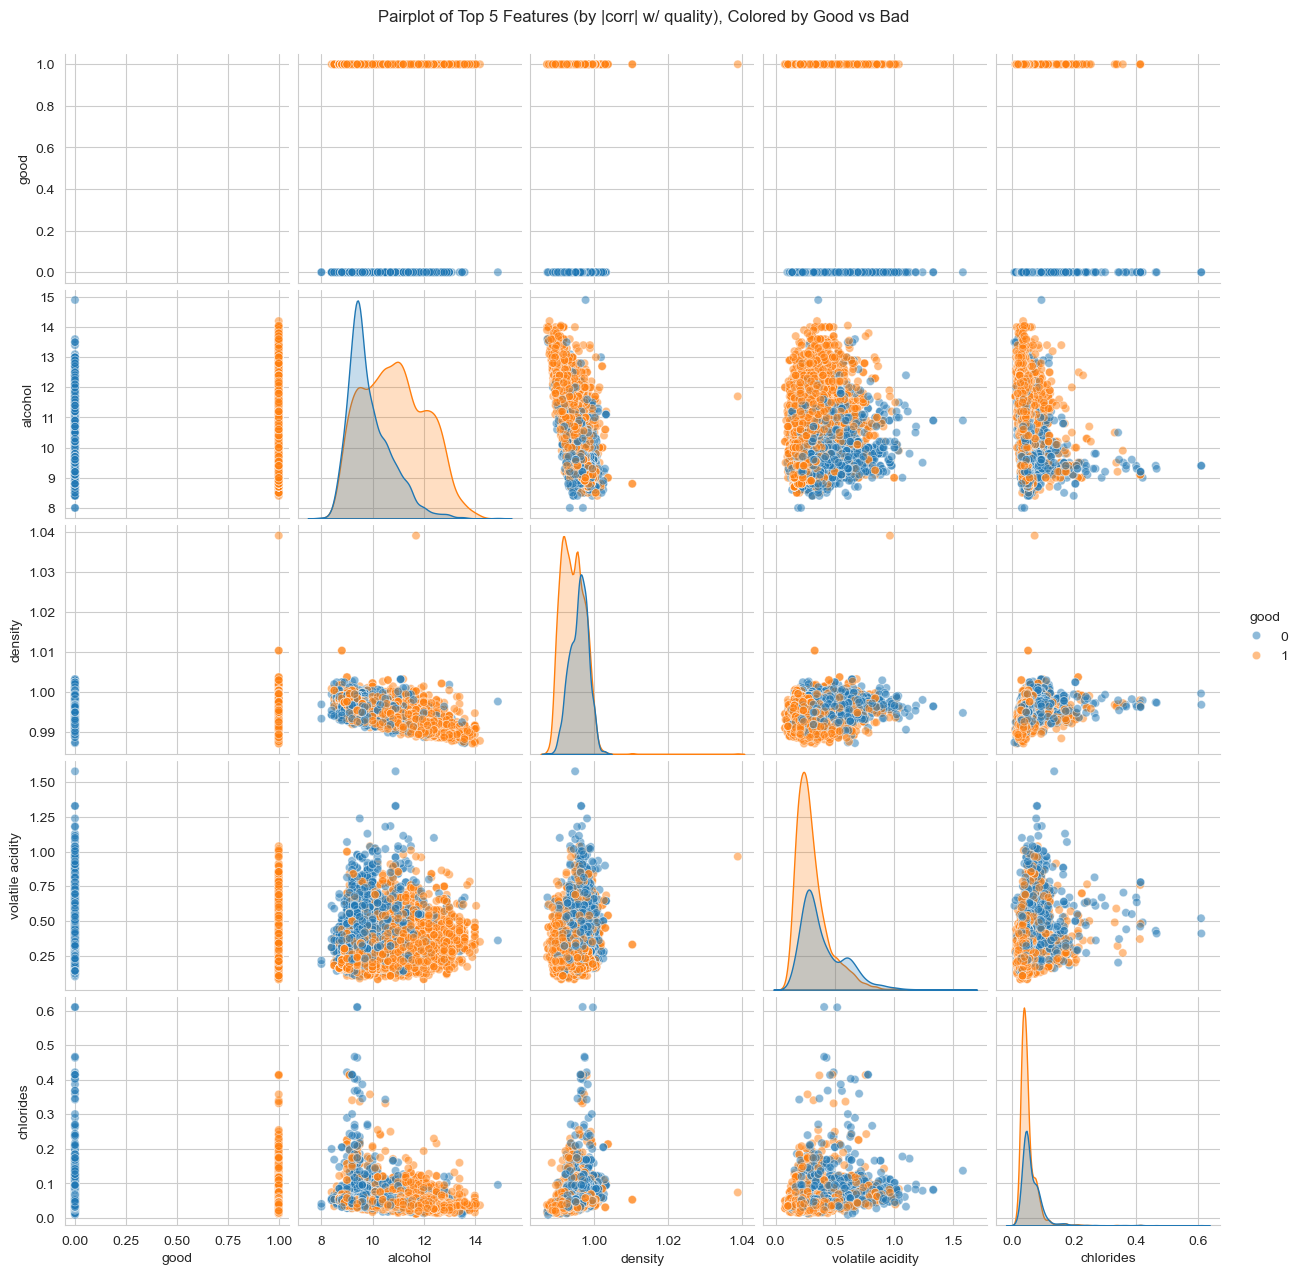

In [34]:
sns.pairplot(df, vars=top_feats, hue="good", diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("Pairplot of Top 5 Features (by |corr| w/ quality), Colored by Good vs Bad", y=1.02)
plt.show()


## Statistical tests between “good” and “bad” groups

In [37]:
from scipy.stats import ttest_ind

results = []
for col in num_cols:
    group_good = df[df["good"] == 1][col]
    group_bad  = df[df["good"] == 0][col]
    stat, pval   = ttest_ind(group_good, group_bad, equal_var=False)
    mean_good    = group_good.mean()
    mean_bad     = group_bad.mean()
    diff         = mean_good - mean_bad
    results.append((col, mean_bad, mean_good, diff, pval))

StatDF = pd.DataFrame(results, columns=["feature", "mean_bad", "mean_good", "mean_diff", "p_value"])
StatDF = StatDF.sort_values("p_value")
display(StatDF)


,feature,mean_bad,mean_good,mean_diff,p_value
10,alcohol,9.873544,10.850158,0.976614,2.094264e-285
7,density,0.995756,0.994083,-0.001673,1.207266e-120
1,volatile acidity,0.397410,0.306196,-0.091214,5.357433e-90
4,chlorides,0.064404,0.051182,-0.013222,2.818044e-40
2,citric acid,0.304178,0.327012,0.022834,6.810934e-09
0,fixed acidity,7.329992,7.148833,-0.181159,4.330402e-08
6,total sulfur dioxide,119.277055,113.697058,-5.579997,2.302002e-04
5,free sulfur dioxide,29.480495,31.130926,1.650431,5.917459e-04
9,sulphates,0.524270,0.535325,0.011054,3.423641e-03
3,residual sugar,5.646225,5.325577,-0.320647,9.849533e-03


## Outlier detection (simple z‐score approach)

In [40]:
from scipy.stats import zscore

z_scores = df[num_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum().sort_values(ascending=False)
display(outliers.to_frame(name="count_outliers"))

# Show a few rows that are extreme in any feature
extreme_idx = z_scores[(z_scores.abs() > 3).any(axis=1)].index
df.loc[extreme_idx].head(10)


,count_outliers
fixed acidity,128
chlorides,107
volatile acidity,95
sulphates,75
free sulfur dioxide,36
pH,33
citric acid,28
residual sugar,26
total sulfur dioxide,8
density,3


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,red,0
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,5,red,0
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5,red,0
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,red,0
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,6,red,1
38,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4,red,0
42,7.5,0.49,0.20,2.6,0.332,8.0,14.0,0.9968,3.21,0.90,10.5,6,red,1
43,8.1,0.66,0.22,2.2,0.069,9.0,23.0,0.9968,3.30,1.20,10.3,5,red,0


## Feature summary by color & good/bad

In [49]:
# By color
color_summary = df.groupby("color")[num_cols].agg(["mean", "std"]).T # .T: stands for Transpose
display(color_summary)

# By good/bad
good_summary = df.groupby("good")[num_cols].agg(["mean", "std"]).T # .T: stands for Transpose
display(good_summary)


color                            red       white
fixed acidity        mean   8.319637    6.854788
                     std    1.741096    0.843868
volatile acidity     mean   0.527821    0.278241
                     std    0.179060    0.100795
citric acid          mean   0.270976    0.334192
                     std    0.194801    0.121020
residual sugar       mean   2.538806    6.391415
                     std    1.409928    5.072058
chlorides            mean   0.087467    0.045772
                     std    0.047065    0.021848
free sulfur dioxide  mean  15.874922   35.308085
                     std   10.460157   17.007137
total sulfur dioxide mean  46.467792  138.360657
                     std   32.895324   42.498065
density              mean   0.996747    0.994027
                     std    0.001887    0.002991
pH                   mean   3.311113    3.188267
                     std    0.154386    0.151001
sulphates            mean   0.658149    0.489847
                     std    0.169507    0.114126
alcohol              mean  10.422983   10.514267
                     std    1.065668    1.230621

good                                0           1
fixed acidity        mean    7.329992    7.148833
                     std     1.268400    1.307965
volatile acidity     mean    0.397410    0.306196
                     std     0.187971    0.138888
citric acid          mean    0.304178    0.327012
                     std     0.162936    0.133356
residual sugar       mean    5.646225    5.325577
                     std     4.917239    4.659456
chlorides            mean    0.064404    0.051182
                     std     0.042812    0.028506
free sulfur dioxide  mean   29.480495   31.130926
                     std    19.844383   16.385229
total sulfur dioxide mean  119.277055  113.697058
                     std    61.887639   53.064708
density              mean    0.995756    0.994083
                     std     0.002464    0.003108
pH                   mean    3.214522    3.220807
                     std     0.161311    0.160457
sulphates            mean    0.524270    0.535325
                     std     0.143764    0.151521
alcohol              mean    9.873544   10.850158
                     std     0.841746    1.219279